# **Model Output Unit Testing**

imports

In [ ]:
import pandas as pd
import numpy as np 
import sqlite3 # get data 
import matplotlib.pyplot as plt 

## Model Weight Analysis

In [22]:
# get .db path
def get_sql_db(path_database: str, name_database: str):
    # etsbalish connection to sqlite3 and allow for querying  
    con = sqlite3.connect(path_database)

    # get databases
    database = pd.read_sql_query(f'SELECT * FROM {name_database}', con = con)

    # set index column to time component and set to index 
    database['index'] = pd.to_datetime(arg = database['index']) # column to datetime 
    database.set_index(keys = database['index'], inplace = True)
    database.drop('index', axis = 1, inplace = True)

    # clean data 
    pd.set_option('future.no_silent_downcasting', True)
    database = database.fillna(0)

    # values from str to float
    nrow = database.shape[0]
    for col in database.columns:
        data = database[col]
        database[col] = [float(data.iloc[w]) for w in range(nrow)]

    return database


In [23]:
# get data 
predicted_weights = get_sql_db(path_database = 'model_output.db', name_database = 'model_output')
actual_weights = get_sql_db(path_database = 'real_invested_weights.db', name_database = 'real_invested_weights')

# get invested amount at each porfolio rebalance
predicted_portfolio_investment = pd.Series([sum(predicted_weights.iloc[i, :]) for i in range(len(predicted_weights))])
actual_portfolio_investment = pd.Series([sum(actual_weights.iloc[i, :]) for i in range(len(actual_weights))])

In [36]:
print('target portfolio weights: \n', predicted_weights, '\n\n actual portfolio weights: \n' ,actual_weights)

target portfolio weights: 
                             BTC-GBP  ETH-GBP  SOL-GBP  ADA-GBP
index                                                         
2026-02-28 19:45:53.739280      0.2      0.2      0.2      0.4
2026-02-28 19:47:51.913308      0.2      0.2      0.4      0.2
2026-02-28 19:49:47.945443      0.2      0.2      0.2      0.4
2026-02-28 19:51:42.725201      0.2      0.2      0.4      0.2
2026-02-28 19:53:39.462200      0.2      0.2      0.2      0.4 

 actual portfolio weights: 
                              BTC-GBP   ETH-GBP   SOL-GBP   ADA-GBP
index                                                             
2026-02-28 19:46:11.344008  0.200353  0.200071  0.200433  0.198023
2026-02-28 19:48:09.528028  0.200283  0.200269  0.398592  0.200585
2026-02-28 19:50:05.542931  0.200102  0.200425  0.200391  0.200825
2026-02-28 19:52:00.326794  0.199934  0.200085  0.200216  0.200087
2026-02-28 19:53:57.019442  0.200117  0.200187  0.200283  0.399167


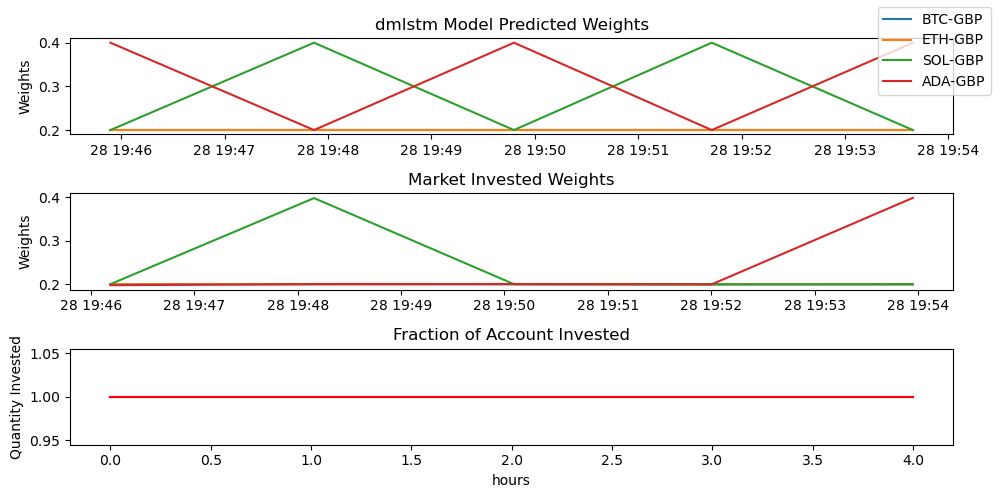

In [41]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 5))

tickers = predicted_weights.columns
ax[0].set_title('dmlstm Model Predicted Weights')
ax[0].plot(predicted_weights, label = tickers)
ax[0].set_ylabel('Weights')

ax[1].set_title('Market Invested Weights')
ax[1].plot(actual_weights)
ax[1].set_ylabel('Weights')

ax[2].set_title('Fraction of Account Invested')
ax[2].plot(predicted_portfolio_investment.round(2), color = 'blue')
ax[2].plot(predicted_portfolio_investment.round(2), color = 'red')
ax[2].set_ylabel('Quantity Invested')
ax[2].set_xlabel('hours')

fig.legend()
plt.tight_layout()

get distribution of predicted weights

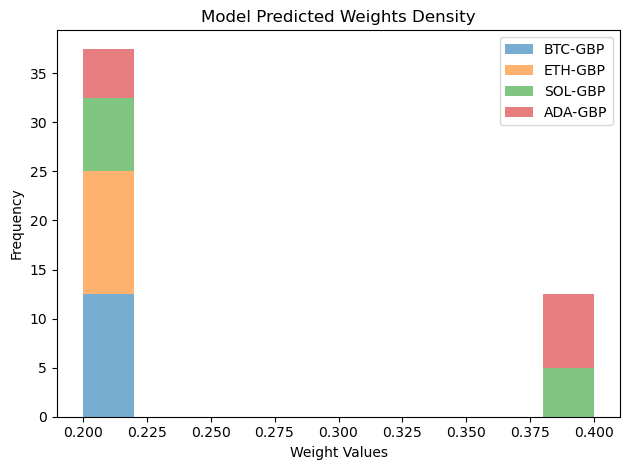

In [42]:
plt.title('Model Predicted Weights Density')
plt.hist(predicted_weights, density = True, histtype = 'barstacked', alpha = 0.6, label = tickers)
plt.ylabel('Frequency')
plt.xlabel('Weight Values')
plt.legend()
plt.tight_layout();